In [1]:
import importlib

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# Use for .mp4 video:
# plt.rcParams["animation.html"] = "html5"
# Use for javascript animation:
plt.rcParams["animation.html"] = "jshtml"
import pandas as pd

from remake import load_remake

import mcs_prime.mcs_mask_plotter as mcs_mask_plotter

loading pixel inputs cache


In [2]:
importlib.reload(mcs_mask_plotter)

start = pd.Timestamp(2020, 1, 1, 0, 30)
end = pd.Timestamp(2020, 1, 1, 12, 30)
times = pd.date_range(start, end, freq='H')

pdata = mcs_mask_plotter.McsMaskPlotterData(times, ['tcwv', 'cape'])
pdata.load()

2020-01-01 00:30:00


In [3]:
mask = (pdata.tracks.dstracks.base_time == times[0]).astype(bool)
pdata.tracks.dstracks.tracks.values[mask.any(axis=1)]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

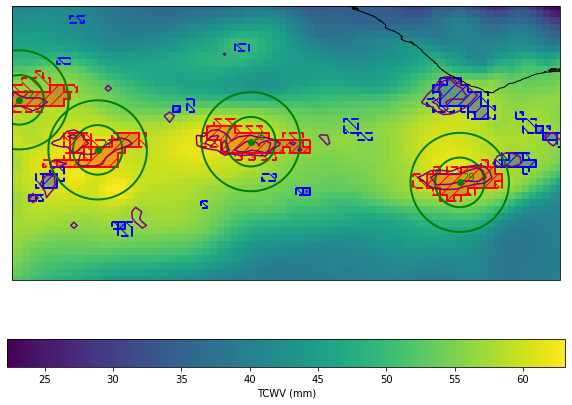

In [4]:
importlib.reload(mcs_mask_plotter)
plotter = mcs_mask_plotter.McsMaskPlotter(pdata)
plotter.plot(None, times[0], 'tcwv', (-25, -5, -2.5, 7.5))
# plotter.plot(times[1], 'cape', (-25, -5, -2.5, 7.5), show_radii=False)
# plotter.plot(times[1], 'tcwv', (-25, -5, -2, 10), show_radii=False)
# plotter.plot(times[1], 'tcwv', (-55, -5, -20, 20), show_radii=False)


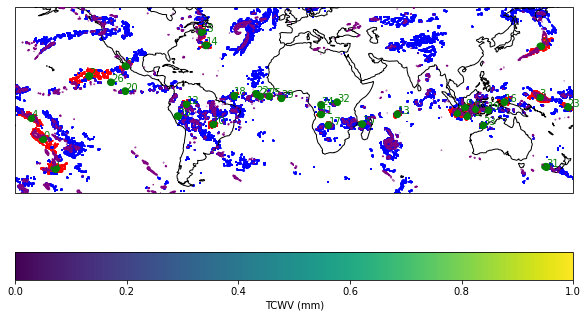

In [6]:
plotter.plot(None, times[1])

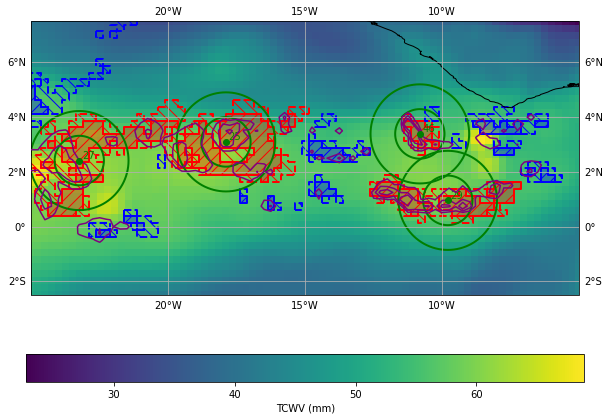

In [7]:
importlib.reload(mcs_mask_plotter)
plotter = mcs_mask_plotter.McsMaskPlotter(pdata)
plotter.plot(time=times[6], var='tcwv', extent=(-25, -5, -2.5, 7.5), grid_x=[-20, -15, -10], grid_y=[-2, 0, 2, 4, 6])

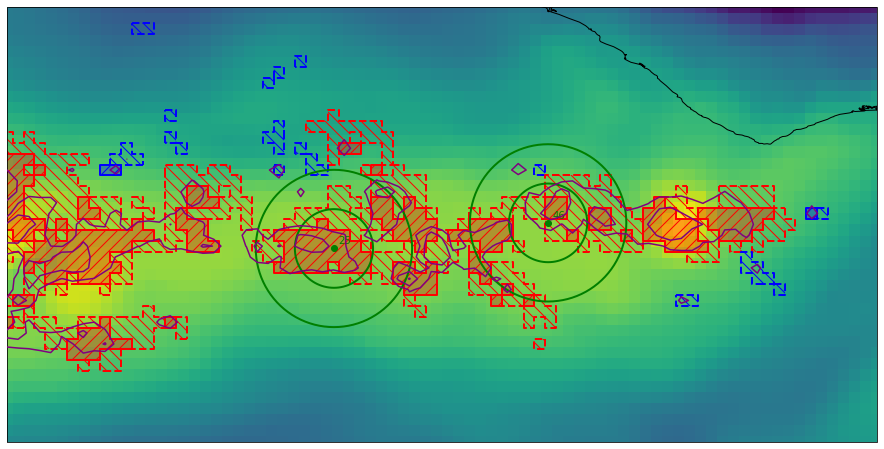

In [26]:
importlib.reload(mcs_mask_plotter)
plotter = mcs_mask_plotter.McsMaskPlotter(pdata)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches((18, 8))

plotter.animate(fig, ax, 
    [
        ((t, 'tcwv', (-25, -5, -2.5, 7.5)), {'show_colourbar': False})
        for t in times
    ])

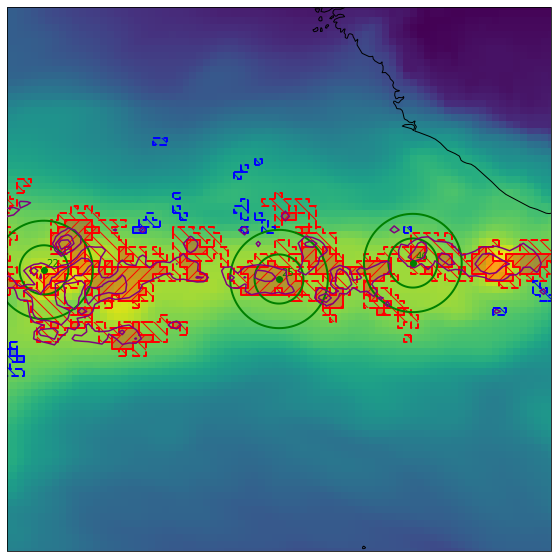

In [12]:
importlib.reload(mcs_mask_plotter)
plotter = mcs_mask_plotter.McsMaskPlotter(pdata)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches((10, 10))

plotter.animate_track(fig, ax, 25)


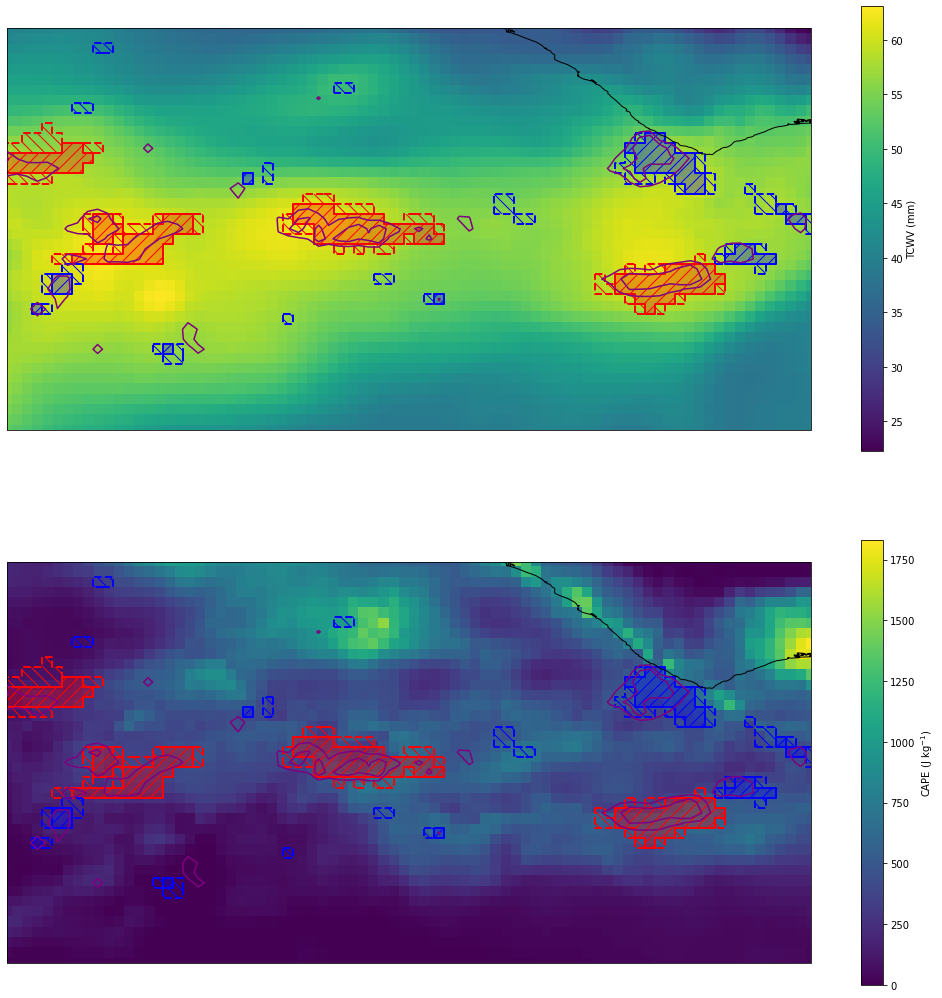

In [20]:
importlib.reload(mcs_mask_plotter)
plotter = mcs_mask_plotter.McsMaskPlotter(pdata)

fig, (ax1, ax2) = plt.subplots(2, 1, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches((18, 18))
plotter.plot(ax1, *(times[0], 'tcwv', (-25, -5, -2.5, 7.5)), **dict(show_radii=False, cbar_kwargs=dict(orientation='vertical')))
plotter.plot(ax2, *(times[0], 'cape', (-25, -5, -2.5, 7.5)), **dict(show_radii=False, cbar_kwargs=dict(orientation='vertical')))
